#Loading every datasets

In [18]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

customers.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [19]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [20]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


#checking null values and object type

In [11]:
# Basic EDA for all datasets
print("Customers Dataset Overview:\n", customers.info(), "\n")
print("Products Dataset Overview:\n", products.info(), "\n")
print("Transactions Dataset Overview:\n", transactions.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Customers Dataset Overview:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Products Dataset Overview:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         

#Checking missing values

In [12]:
# Missing values
print("Missing Values:\n")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

Missing Values:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
YearMonth          0
Year               0
Month              0
dtype: int64


#checking any duplicate rows are there or not

In [13]:
# Duplicate rows
print("\nDuplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())


Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


#ploting the number of customers from each region

/var/folders/14/wryybrhn7vs_rn8bd161jqjh0000gn/T/ipykernel_15382/270241083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="viridis")


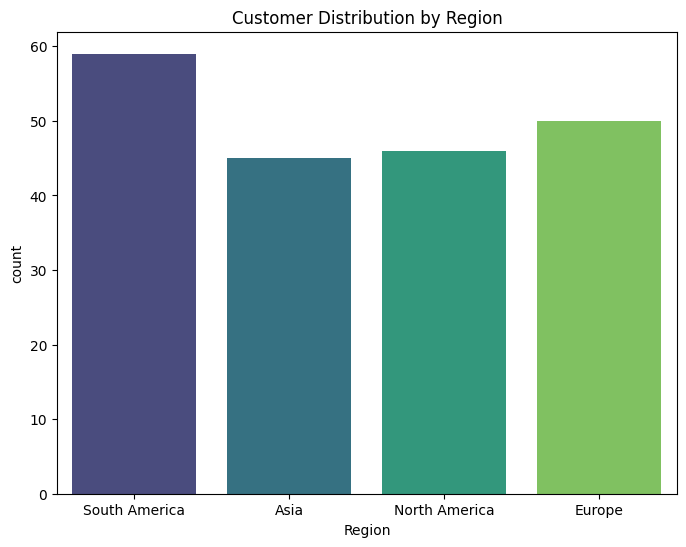

In [14]:
# Visualizing Customer Region distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Customer Distribution by Region")
plt.show()


#Ploting the product distribution through category

/var/folders/14/wryybrhn7vs_rn8bd161jqjh0000gn/T/ipykernel_15382/978458158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y="Category", palette="mako", order=products['Category'].value_counts().index)


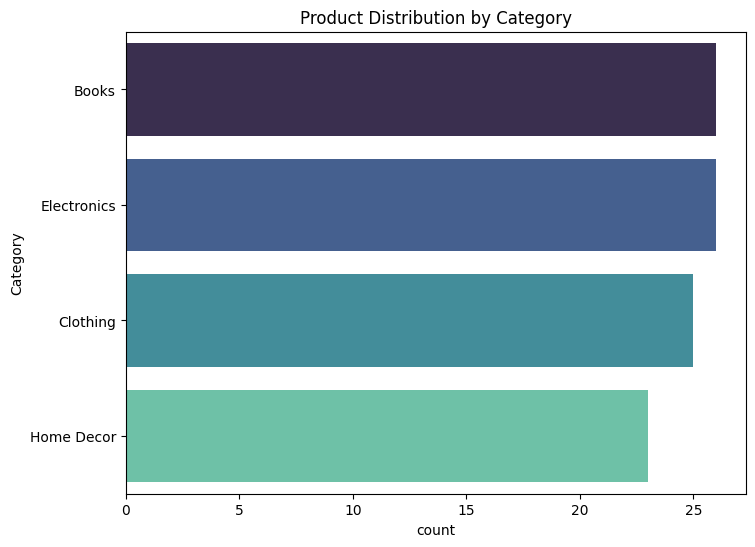

In [15]:
# Visualizing Product Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=products, y="Category", palette="mako", order=products['Category'].value_counts().index)
plt.title("Product Distribution by Category")
plt.show()

#Plotting monthly transaction

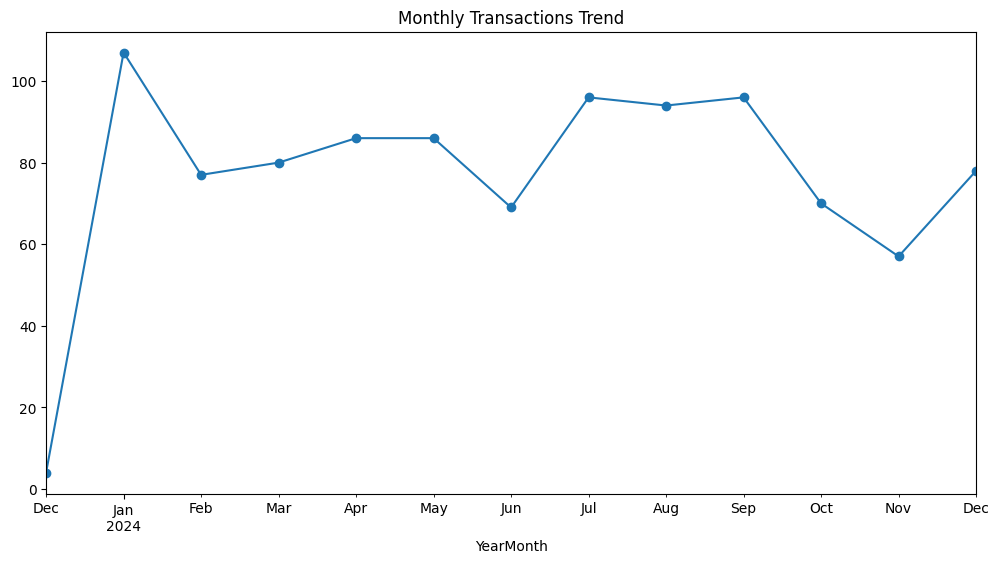

In [17]:
# Monthly transaction trends
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

monthly_transactions = transactions.groupby('YearMonth').size()
monthly_transactions.plot(kind='line', figsize=(12, 6), marker='o', title="Monthly Transactions Trend")
plt.show()

In [10]:
# Extract the year from 'TransactionDate'
transactions['Year'] = transactions['TransactionDate'].dt.year

# Get the total number of unique years
unique_years_count = transactions['Year'].nunique()

print(f"Total unique years: {unique_years_count}")


Total unique years: 2


#plotting the different years transaction history separately (this shows that we have only few transaction from 2023)

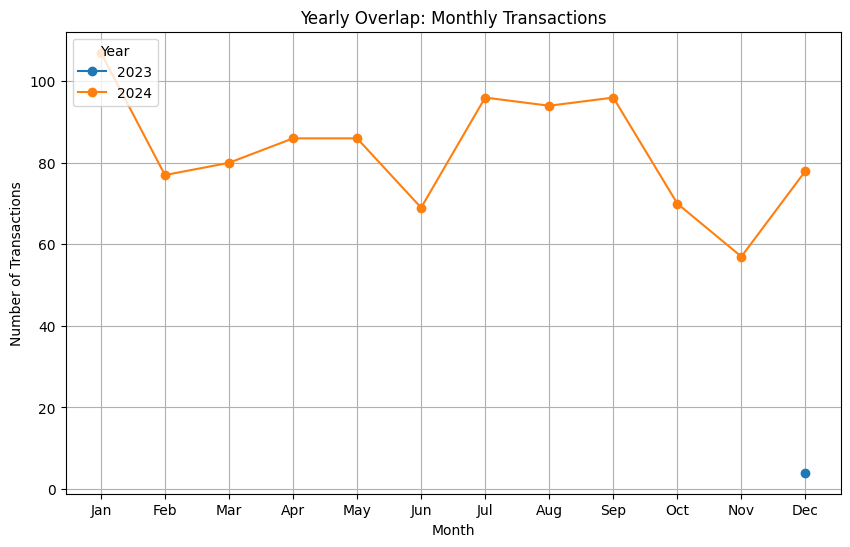

In [7]:
import matplotlib.pyplot as plt

# Extract year and month from the TransactionDate
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month

# Group by year and month to count transactions
yearly_data = transactions.groupby(['Year', 'Month']).size().reset_index(name='TransactionCount')

# Pivot the data to create a matrix where each year is a column
yearly_pivot = yearly_data.pivot(index='Month', columns='Year', values='TransactionCount')

# Plot the yearly overlaps
plt.figure(figsize=(10, 6))
for year in yearly_pivot.columns:
    plt.plot(yearly_pivot.index, yearly_pivot[year], label=year, marker='o')

# Add plot details
plt.title("Yearly Overlap: Monthly Transactions")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year", loc="upper left")
plt.grid(True)
plt.show()


1st Insight- CLV

merged the two datasets by customerID

In [2]:
import pandas as pd

# Load datasets
transactions = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv')

# Convert dates to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Merge datasets on CustomerID
data = pd.merge(transactions, customers, on='CustomerID')

data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [19]:
# 1. Calculated the total revenue per customer
total_revenue = data.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_revenue.rename(columns={'TotalValue': 'TotalRevenue'}, inplace=True)
print(total_revenue)

    CustomerID  TotalRevenue
0        C0001       3354.52
1        C0002       1862.74
2        C0003       2725.38
3        C0004       5354.88
4        C0005       2034.24
..         ...           ...
194      C0196       4982.88
195      C0197       1928.65
196      C0198        931.83
197      C0199       1979.28
198      C0200       4758.60

[199 rows x 2 columns]


In [20]:
# 2. Calculated the number of transactions per customer
transaction_count = data.groupby('CustomerID')['TransactionID'].count().reset_index()
transaction_count.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)
print(transaction_count)

    CustomerID  TransactionCount
0        C0001                 5
1        C0002                 4
2        C0003                 4
3        C0004                 8
4        C0005                 3
..         ...               ...
194      C0196                 4
195      C0197                 3
196      C0198                 2
197      C0199                 4
198      C0200                 5

[199 rows x 2 columns]


In [21]:
# 3. calculated customer lifetime in months
customer_lifetime = data.groupby('CustomerID').agg(
    FirstTransaction=('TransactionDate', 'min'),
    LastTransaction=('TransactionDate', 'max')
).reset_index()
customer_lifetime['LifetimeMonths'] = (
    (customer_lifetime['LastTransaction'] - customer_lifetime['FirstTransaction']).dt.days / 30
).round()

print(customer_lifetime)

    CustomerID    FirstTransaction     LastTransaction  LifetimeMonths
0        C0001 2024-01-19 03:12:55 2024-11-02 17:04:16            10.0
1        C0002 2024-02-28 07:44:21 2024-12-03 01:41:41             9.0
2        C0003 2024-02-18 02:50:37 2024-08-24 18:54:04             6.0
3        C0004 2024-02-28 10:16:35 2024-12-23 14:13:52            10.0
4        C0005 2024-03-15 04:08:59 2024-11-04 00:30:22             8.0
..         ...                 ...                 ...             ...
194      C0196 2024-08-06 14:37:15 2024-12-15 03:43:35             4.0
195      C0197 2024-01-13 04:52:09 2024-12-27 18:20:31            12.0
196      C0198 2024-09-29 16:14:59 2024-10-04 18:31:12             0.0
197      C0199 2024-08-17 12:06:08 2024-10-26 00:01:58             2.0
198      C0200 2024-04-27 19:06:20 2024-12-11 03:05:50             8.0

[199 rows x 4 columns]


In [28]:
# merged metrics into a single DataFrame
clv_data = pd.merge(total_revenue, transaction_count, on='CustomerID')
clv_data = pd.merge(clv_data, customer_lifetime[['CustomerID', 'LifetimeMonths']], on='CustomerID')
clv_data['AverageFrequency'] = clv_data['TransactionCount'] / clv_data['LifetimeMonths']
clv_data['CLV'] = clv_data['TotalRevenue'] * clv_data['AverageFrequency']
print(clv_data)

    CustomerID  TotalRevenue  TransactionCount  LifetimeMonths  \
0        C0001       3354.52                 5            10.0   
1        C0002       1862.74                 4             9.0   
2        C0003       2725.38                 4             6.0   
3        C0004       5354.88                 8            10.0   
4        C0005       2034.24                 3             8.0   
..         ...           ...               ...             ...   
194      C0196       4982.88                 4             4.0   
195      C0197       1928.65                 3            12.0   
196      C0198        931.83                 2             0.0   
197      C0199       1979.28                 4             2.0   
198      C0200       4758.60                 5             8.0   

     AverageFrequency          CLV  
0            0.500000  1677.260000  
1            0.444444   827.884444  
2            0.666667  1816.920000  
3            0.800000  4283.904000  
4            0.375000 

#As some customers had 0 lifetime the CLV was coming out to be infinite so we have dropped those rows as they were not in large size

In [29]:
clv_data = clv_data.replace([float('inf'), float('nan')], pd.NA).dropna(subset=['CLV'])

#Caraterized the customers in three segments (low,medium,high) through CLV

In [31]:
clv_data['CLVSegment'] = pd.qcut(clv_data['CLV'], q=3, labels=['Low', 'Medium', 'High'])
print(clv_data)

    CustomerID  TotalRevenue  TransactionCount  LifetimeMonths  \
0        C0001       3354.52                 5            10.0   
1        C0002       1862.74                 4             9.0   
2        C0003       2725.38                 4             6.0   
3        C0004       5354.88                 8            10.0   
4        C0005       2034.24                 3             8.0   
..         ...           ...               ...             ...   
193      C0195       4036.27                 6             9.0   
194      C0196       4982.88                 4             4.0   
195      C0197       1928.65                 3            12.0   
197      C0199       1979.28                 4             2.0   
198      C0200       4758.60                 5             8.0   

    AverageFrequency          CLV CLVSegment  
0                0.5      1677.26     Medium  
1           0.444444   827.884444        Low  
2           0.666667      1816.92     Medium  
3                0.

#HERE have plotted toal customers in each segment

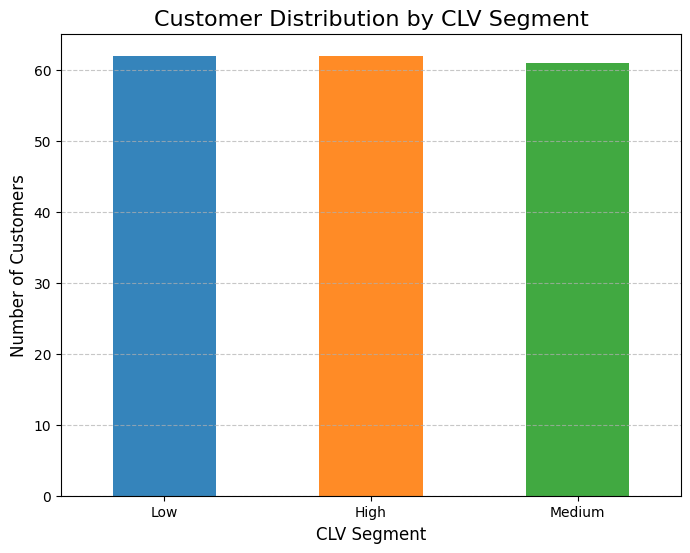

In [32]:
import matplotlib.pyplot as plt


segment_counts = clv_data['CLVSegment'].value_counts()


plt.figure(figsize=(8, 6))
segment_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.9)
plt.title('Customer Distribution by CLV Segment', fontsize=16)
plt.xlabel('CLV Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Average CLV per segment

/var/folders/14/wryybrhn7vs_rn8bd161jqjh0000gn/T/ipykernel_1115/1565618486.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_clv_per_segment = clv_data.groupby('CLVSegment')['CLV'].mean()


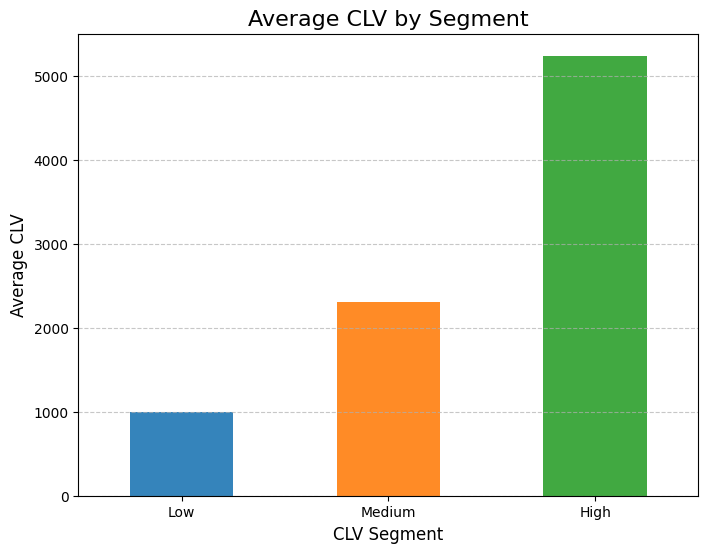

In [33]:
avg_clv_per_segment = clv_data.groupby('CLVSegment')['CLV'].mean()

plt.figure(figsize=(8, 6))
avg_clv_per_segment.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.9)
plt.title('Average CLV by Segment', fontsize=16)
plt.xlabel('CLV Segment', fontsize=12)
plt.ylabel('Average CLV', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/var/folders/14/wryybrhn7vs_rn8bd161jqjh0000gn/T/ipykernel_1115/2304747679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clv_data, x='CLVSegment', y='CLV', palette='Set2')


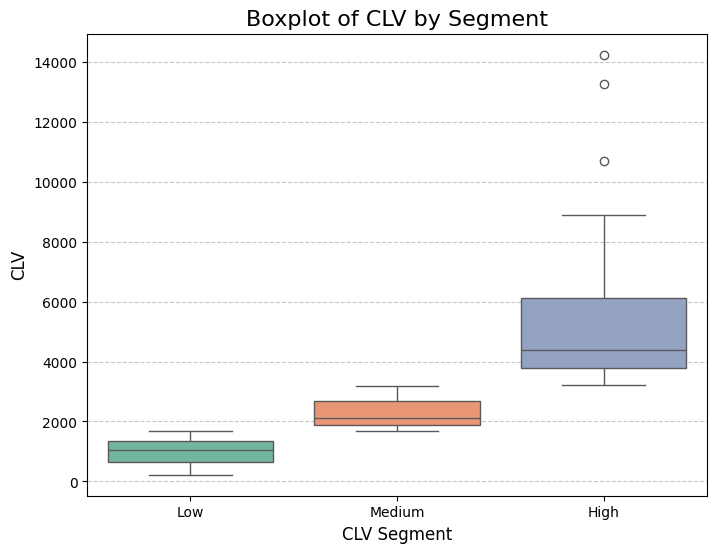

In [34]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=clv_data, x='CLVSegment', y='CLV', palette='Set2')
plt.title('Boxplot of CLV by Segment', fontsize=16)
plt.xlabel('CLV Segment', fontsize=12)
plt.ylabel('CLV', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Knowing the 10 most valuable customers

    CustomerID          CLV
152      C0153     14234.37
81       C0082   13252.5925
140      C0141     10673.87
174      C0175  8872.185714
103      C0104  8772.133333
180      C0182  8301.283333
64       C0065       7663.7
53       C0054  7147.013333
44       C0045  7025.433333
155      C0156  6998.245833


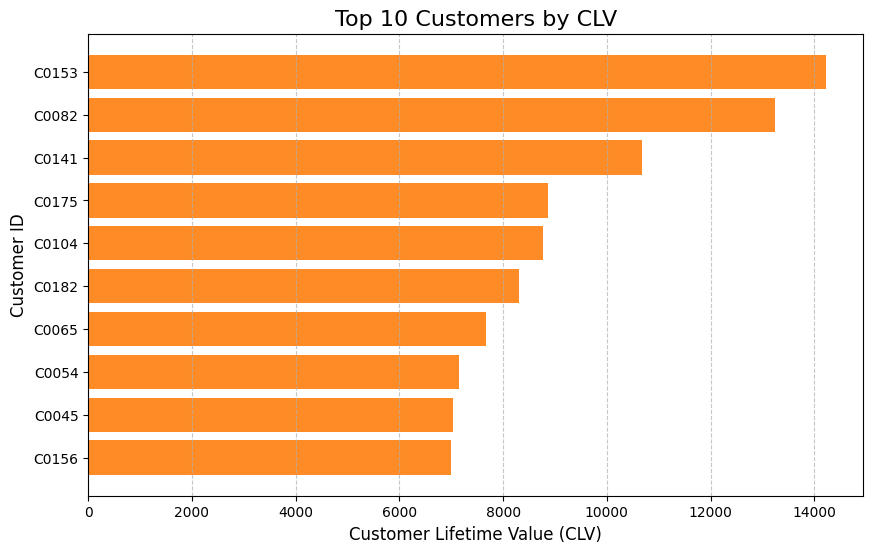

In [37]:
top_customers = clv_data.sort_values(by='CLV', ascending=False).head(10)

print(top_customers[['CustomerID', 'CLV']])

plt.figure(figsize=(10, 6))
plt.barh(top_customers['CustomerID'].astype(str), top_customers['CLV'], color='#ff7f0e', alpha=0.9)
plt.title('Top 10 Customers by CLV', fontsize=16)
plt.xlabel('Customer Lifetime Value (CLV)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


2nd insight-Product Category Sales Trends Over Time



In [39]:
import pandas as pd

# Load datasets
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

merged_data = pd.merge(transactions, products[['ProductID', 'Category']], on='ProductID', how='left')

In [41]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'Category'],
      dtype='object')


In [42]:
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     Category  
0      300.68  300.68  Electronics  
1      300.68  300.68  Electronics  
2      300.68  300.68  Electronics  
3      601.36  300.68  Electronics  
4      902.04  300.68  Electronics  


In [43]:
# Recreate the 'YearMonth' column to ensure it's correct
merged_data['YearMonth'] = pd.to_datetime(merged_data['TransactionDate']).dt.to_period('M')


In [44]:
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     Category YearMonth  
0      300.68  300.68  Electronics   2024-08  
1      300.68  300.68  Electronics   2024-05  
2      300.68  300.68  Electronics   2024-04  
3      601.36  300.68  Electronics   2024-03  
4      902.04  300.68  Electronics   2024-03  


In [45]:
# Group by YearMonth and Category, and sum the TotalValue for each group
category_sales = merged_data.groupby(['YearMonth', 'Category'])['TotalValue'].sum().reset_index(name='TotalSales')


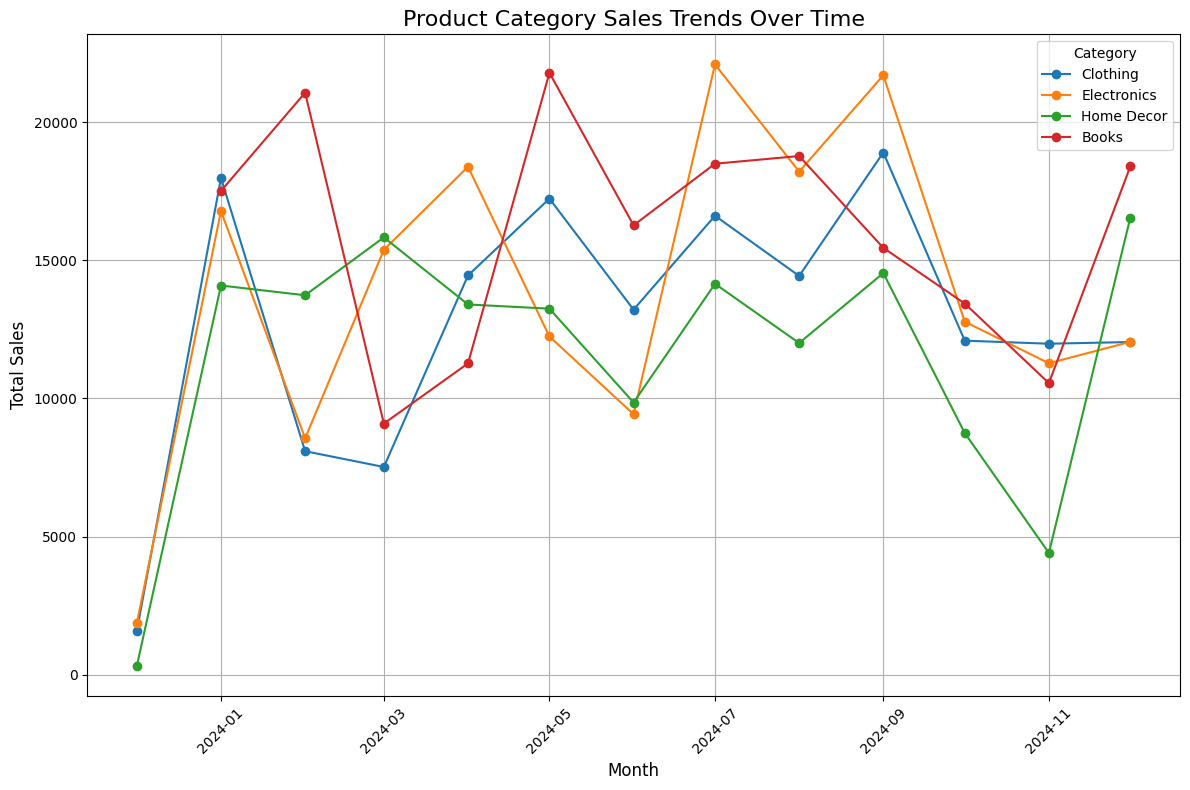

In [47]:
# Convert YearMonth to datetime
category_sales['YearMonth'] = category_sales['YearMonth'].dt.to_timestamp()

# Plot the sales trends for each category over time
plt.figure(figsize=(12, 8))

# Loop through each category and plot its sales over time
for category in category_sales['Category'].unique():
    category_data = category_sales[category_sales['Category'] == category]
    plt.plot(category_data['YearMonth'], category_data['TotalSales'], label=category, marker='o')

# Add plot details
plt.title('Product Category Sales Trends Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#3rd insight-Region-Based Segmentation for Marketing and Inventory

In [49]:
import pandas as pd

# Load datasets
transactions = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv')

# Merge transactions with customer data to get region info for each transaction
merged_data = pd.merge(transactions, customers[['CustomerID', 'Region']], on='CustomerID', how='left')


In [59]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Region
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Europe
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Asia
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Europe
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,South America
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Europe


In [53]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [54]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [58]:
unique_customer_count = merged_data["CustomerID"].nunique()
print(unique_customer_count)

199


In [52]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   Region           1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB



Regional Distribution:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


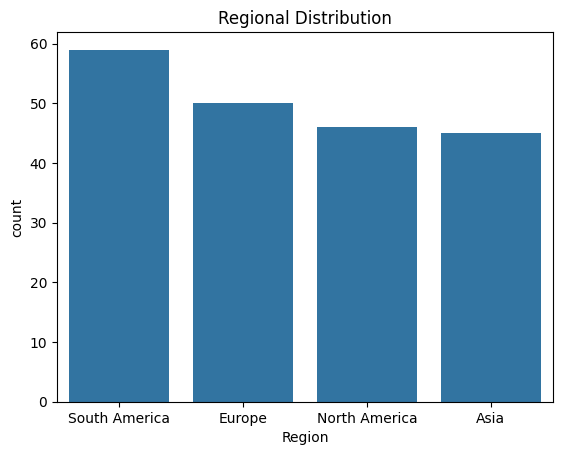

In [51]:
# Regional Distribution
print("\nRegional Distribution:\n", customers['Region'].value_counts())

# Visualizing regional distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title("Regional Distribution")
plt.show()


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Merge datasets for Lookalike Model
data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

# Feature engineering for similarity calculation
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': lambda x: x.mode()[0],
    'Category': lambda x: x.mode()[0]
}).reset_index()

# Encode categorical columns
customer_features = pd.get_dummies(customer_features, columns=['Region', 'Category'], drop_first=True)

# Normalize numerical columns
scaler = StandardScaler()
numerical_cols = ['TotalValue', 'Quantity']
customer_features[numerical_cols] = scaler.fit_transform(customer_features[numerical_cols])

# Calculate cosine similarity
customer_ids = customer_features['CustomerID']
features_matrix = customer_features.drop('CustomerID', axis=1).values
similarity_matrix = cosine_similarity(features_matrix)

# Find top 3 similar customers for each customer
lookalikes = {}
for i, customer_id in enumerate(customer_ids):
    similarity_scores = list(enumerate(similarity_matrix[i]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_3 = [(customer_ids[j], score) for j, score in similarity_scores[1:4]]
    lookalikes[customer_id] = top_3

# Save the Lookalike data
lookalike_df = pd.DataFrame({
    "CustomerID": customer_ids,
    "Lookalikes": [lookalikes[cid] for cid in customer_ids]
})
lookalike_df.to_csv("Lookalike.csv", index=False)
print("Lookalike Model completed! Results saved in Lookalike.csv")


Lookalike Model completed! Results saved in Lookalike.csv


Davies-Bouldin Index: 1.5876229769612094


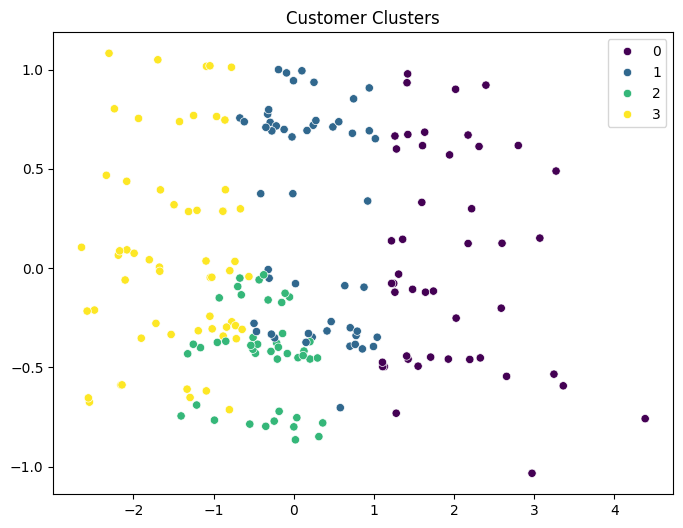

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Using the same customer_features from Task 2
X = customer_features.drop('CustomerID', axis=1)

# Apply PCA for dimensionality reduction (optional for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(X)

# Add cluster labels to customer_features
customer_features['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, clusters)
print("Davies-Bouldin Index:", db_index)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis")
plt.title("Customer Clusters")
plt.show()
